Indiquer les pourcentages de produit inactif 
Ne pas parler des outliers dans la mission 1.
Mettre plus de graphiques
ajouter des graphiques 

Inclure dans le diaporama les moyennes des prix par categ

Ajouter les scatterplot 

# Sommaire 

[Mission n°1](#Mission-n°1)

[A. Importation des bibliothèques](#A.-Importation-des-bibliothèques)

[B. Importation et réorganisation des données](#B.-Importation-et-réorganisation-des-données)

[1. Importation](#1.-Importation)

[2. Réorganisation](#2.-Réorganisation)

[a. La table customers](#a.-La-table-customers)

[b. La table products](#b.-La-table-products)

[c. La table association](#c.-La-table-association)

[3. Jointure des tables, et traitement des NaN](#3.-Jointure-des-tables,-et-traitement-des-NaN)

[Mission n°2](#Mission-n°2)

[Mission n°3](#Mission-n°3)

[1. Corrélation entre le sexe des clients et les catégories de produits achetés](#1.-Corrélation-entre-le-sexe-des-clients-et-les-catégories-de-produits-achetés)

[2. Corrélations entre l'âge des clients et :](#2.-Corrélations-entre-l'âge-des-clients-et-:)

[a. Le montant total des achats](#a.-Le-montant-total-des-achats)

[b. La fréquence d'achat](#b.-La-fréquence-d'achat)

[c. La taille du panier moyen](#c.-La-taille-du-panier-moyen)

[d. Les catégories de produits achetés](#d.-Les-catégories-de-produits-achetés)

# Mission n°1

## A. Importation des bibliothèques

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import scipy.stats as st
import statsmodels.api as sm

## B. Importation et réorganisation des données

### 1. Importation

Trois tables sont à importer. 

In [127]:
customers = pd.read_csv('C:\\Users\\octav\\Google Drive\\OC_Data Analyst_GORAM Octave\\Projets\\Projet 4\\CSV\\customers.csv',parse_dates=[1,2]) # parse_dates permet d'indiquer qu'elle colonne contient des dates
products = pd.read_csv('C:\\Users\\octav\\Google Drive\\OC_Data Analyst_GORAM Octave\\Projets\\Projet 4\\CSV\\products.csv')
association = pd.read_csv('C:\\Users\\octav\\Google Drive\\OC_Data Analyst_GORAM Octave\\Projets\\Projet 4\\CSV\\transactions.csv',parse_dates=[1,1])

### 2. Réorganisation

#### a. La table customers

In [128]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967-01-01
1,c_7839,f,1975-01-01
2,c_1699,f,1984-01-01
3,c_5961,f,1962-01-01
4,c_5320,m,1943-01-01


La table `customers` indique l'identfiant des clients, leurs sex et leurs date de naissance.
S'agissant des dates de naissances des clients, seul l'année est connu. Ainsi, lorsque la date de naissance est convertie en date au sens de pandas, elle est affichée au format "aaaa-mm-jj", faut donc la convertir au format année : 

In [129]:
customers['birth'] = pd.DatetimeIndex(customers['birth']).year  
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


Nous calculons l'age des clients au moment de leurs inscriptions sur le site :

In [130]:
customers['age'] = 2022 - customers['birth']

On vérifie le contenue de la colonne "sex" :

In [131]:
customers['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

Comme attendu la série ne contient que les valeurs "f" ou "m".

On s'intéresse désormais à l'age des clients

In [132]:
customers['age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

On ne constate pas d'ouliers.

In [133]:
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


#### b. La table products

In [134]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


La table products nous donne l'identifiant des produits, leurs prix et la catégorie de chaque produit. 
L'aperçu de la table ci-dessus nous laisse entrevoir que le premier chiffer de l'identifiant du produit correspond à celui de la catégorie du produit.
Nous le vérifions : 

Nous créons la colonne `verif` qui contient le premier `string` de la colonne `id_prod` pour chaque ligne afin de voir si le permier chiffre de l'id_prod correspond à la colonne categ : 

In [135]:
products['verif'] = products['id_prod'].str[0]

Pour vérifier la correspondance, nous devons convertir en `int` les colonnes concernées. 
Au moins une ligne ne peut pas être convertie en `int64` car il y a un `T`.

In [136]:
products['verif'].loc[products['verif'] == 'T']

731    T
Name: verif, dtype: object

In [137]:
products.iloc[731]

id_prod    T_0
price       -1
categ        0
verif        T
Name: 731, dtype: object

La ligne 731 présente des anomalies, le `string` `T` et un prix négatif pour la produit correspondant. 
Nous pouvons donc comparer le nombre de ligne avant et après avoir retiré les données anormales : 

In [138]:
products.shape

(3287, 4)

In [139]:
products = products.loc[products['verif'] != 'T'] # restriction pour retirer les lignes avec T 
products = products.reset_index(drop = True)
products[['verif']] = products[['verif']].astype(np.int64) # transformation de la colonne verif en int64 pour pouvoir la comparer avec la colonne categ
products.loc[products['verif'] == products['categ']].shape # restriction visant à ne garder que les lignes pour lesquels les colonnes verif et categ sont égales


(3286, 4)

La seule ligne perdue est celle supprimée, les colonnes "verif" et "categ" correspondent donc bien. 
Nous avons désormais la certitude que le premier chiffre de chaque ligne de la colonne `id_prod` est égale au chiffre de la colonne `categ` de la même ligne.

In [140]:
products.loc[products['price'] < 0]

,id_prod,price,categ,verif


Il n'y a pas d'autres prix négatif.

In [141]:
products = products[['id_prod', 'price', 'categ']] # retrait de la colonne verif

In [142]:
products['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

On ne constate pas d'ouliers. 

Nous vérifions les différentes catégories de produits exitantes : 

In [143]:
products['categ'].value_counts()

0    2308
1     739
2     239
Name: categ, dtype: int64

#### c. La table association

In [144]:
association.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


Cette table est une table d'association pour les deux autres tables vus précédement. Elle permet de mettre en rapport les clients avec les produit et ajoute un identifiant de session ainsi qu'une date de transaction. 

Nous vérifions à quoi correspond l'`id_prod` `T_0` dans cette table d'associaton car elle semblait porteuse d'anomalies : 

In [145]:
association.loc[association['id_prod'] == 'T_0'].head(10)

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
13745,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
20470,T_0,test_2021-03-01 02:30:02.237442,s_0,ct_0
22347,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
26359,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
26407,T_0,test_2021-03-01 02:30:02.237426,s_0,ct_0


In [146]:
association.loc[association['id_prod'] == 'T_0'].shape

(200, 4)

In [147]:
association.loc[association['client_id'] == 'ct_1'].shape

(94, 4)

In [148]:
association.loc[association['client_id'] == 'ct_0'].shape

(106, 4)

In [149]:
association.loc[association['session_id'] == 's_0'].shape

(200, 4)

Toutes les transactions liées à cet `id_prod` semble uniquement être le fruit de tests. La mention test apparait dans la date en toute lettre. Nous n'aurons pas besoin de ces données, nous les supprimons donc : 

In [150]:
association = association.loc[association['id_prod'] != 'T_0']
association.reset_index(inplace = True, drop = True)

Nous vérifions désormais que le fait de supprimer la valeur "T_0" de notre table a bien permis de supprimer toutes les valeurs test connues : 

In [151]:
association.loc[association['id_prod'] == 'T_0'] | association.loc[association['session_id'] == 's_0' ] | association.loc[association['client_id'] == 'ct_0' ] | association.loc[association['client_id'] == 'ct_1' ] | association[association['date'].str.contains('test') == True]


,id_prod,date,session_id,client_id


Les valeurs test connues ont toutes été supprimées.

Nous vérifions les clefs primaires de nos tables : 

In [152]:
def primary_key(dataframe,cle_candidate):
    if dataframe.dropna(subset=cle_candidate).drop_duplicates(subset=cle_candidate, keep=False).shape == dataframe.shape: 
        return print('This is a Primary key') 
    else: 
        return print('This might help you: https://en.wikipedia.org/wiki/Primary_key')

In [153]:
primary_key(products,['id_prod'])

This is a Primary key


In [154]:
primary_key(customers,['client_id'])

This is a Primary key


In [155]:
primary_key(association,['date'])

This is a Primary key


### 3. Jointure des tables, et traitement des NaN

In [156]:
transactions = customers.merge(association, how ='outer', on=['client_id'], indicator='merge_1')

In [157]:
transactions.loc[transactions['merge_1'] == 'right_only'].head()

,client_id,sex,birth,age,id_prod,date,session_id,merge_1


In [158]:
transactions.loc[transactions['merge_1'] == 'left_only'].head()

,client_id,sex,birth,age,id_prod,date,session_id,merge_1
29516,c_8253,f,2001,21,NaN,NaN,NaN,left_only
99355,c_3789,f,1997,25,NaN,NaN,NaN,left_only
108189,c_4406,f,1998,24,NaN,NaN,NaN,left_only
108190,ct_0,f,2001,21,NaN,NaN,NaN,left_only
109297,c_2706,f,1967,55,NaN,NaN,NaN,left_only


Nous constatons que des clients n'ont aucune transaction à ce jour, il nous faut déterminer la part de client inactif sur le portefeuille total : 

In [159]:
transactions.loc[transactions['merge_1'] == 'left_only'].shape[0]

23

In [160]:
round(100 * transactions.loc[transactions['merge_1'] == 'left_only'].shape[0] / transactions.shape[0],4)

0.0068

Le pourcentage de client inactif est négligable, nous pouvons donc retirer de notre table ces clients :

In [161]:
transactions = transactions.loc[transactions['merge_1'] != 'left_only']

Nous procédons désormais à la jointure avec la table products : 

In [162]:
transactions = transactions.merge(products, how ='outer', on=['id_prod'], indicator='merge_2')
transactions.reset_index(drop=True, inplace=True)

In [163]:
transactions.loc[transactions['merge_2'] == 'left_only'].head()

,client_id,sex,birth,age,id_prod,date,session_id,merge_1,price,categ,merge_2
266960,c_4505,m,1976.0,46.0,0_2245,2022-01-09 09:23:31.000720,s_147220,both,NaN,NaN,left_only
266961,c_3468,f,1981.0,41.0,0_2245,2021-09-11 10:52:05.205583,s_88251,both,NaN,NaN,left_only
266962,c_1403,f,1978.0,44.0,0_2245,2022-02-15 14:26:50.187952,s_165575,both,NaN,NaN,left_only
266963,c_3065,f,1977.0,45.0,0_2245,2022-01-26 13:34:33.440366,s_155484,both,NaN,NaN,left_only
266964,c_7102,m,1983.0,39.0,0_2245,2021-04-25 19:58:42.716401,s_25704,both,NaN,NaN,left_only


Le produit 0_2245 n'a pas de prix.
Nous allons lui en imputer un en nous basant sur certains indicateurs.
L'identifiant du produit nous permet de déterminer que la catégorie du produit est "0".
Nous commençons par calculer le chiffre d'affaire de notre entreprise pour vérifier que le l'impacte de notre imputation est négligeable :

In [164]:
ancien_CA = transactions['price'].count()
ancien_CA

336735

In [165]:
transactions.loc[transactions['categ'] == 0].describe()

,birth,age,price,categ
count,209426.000000,209426.000000,209443.000000,209443.0
mean,1978.102280,43.897720,10.647072,0.0
std,11.203684,11.203684,4.930949,0.0
min,1929.000000,18.000000,0.620000,0.0
25%,1974.000000,36.000000,6.300000,0.0
50%,1980.000000,42.000000,9.990000,0.0
75%,1986.000000,48.000000,14.450000,0.0
max,2004.000000,93.000000,40.990000,0.0


Il y a peu de dispertion dans cette distribution, nous pouvons indiférament choisir comme valeur pour l'imputation la moyenne ou la médiane, nous choisirons la moyenne arrondie aux centièmes comme il n'y a pas d'_outliers_. 

In [166]:
transactions['price'] = transactions['price'].fillna(10.65)
transactions['categ'] = transactions['categ'].fillna(0).astype('int64')

Nous pouvons désormais calculer la variation de chiffre d'affaire liée à cette imputation : 

In [167]:
round(100 * transactions['price'].loc[transactions['id_prod'] == '0_2245'].count() / ancien_CA,2)

0.03

La variation de chiffre d'affaire liée à cette imputation est négligeable. 

In [168]:
transactions.loc[transactions['merge_2'] == 'right_only'].head()

,client_id,sex,birth,age,id_prod,date,session_id,merge_1,price,categ,merge_2
336816,NaN,NaN,NaN,NaN,0_1016,NaN,NaN,NaN,35.06,0,right_only
336817,NaN,NaN,NaN,NaN,0_1780,NaN,NaN,NaN,1.67,0,right_only
336818,NaN,NaN,NaN,NaN,0_1062,NaN,NaN,NaN,20.08,0,right_only
336819,NaN,NaN,NaN,NaN,0_1119,NaN,NaN,NaN,2.99,0,right_only
336820,NaN,NaN,NaN,NaN,0_1014,NaN,NaN,NaN,1.15,0,right_only


Certains produits n'ont jamais fait l'objet de transactions, nous allons vérifier quel pourcentage de nos produits est concerné.

In [169]:
transactions.loc[transactions['merge_2'] == 'right_only'].shape[0]

22

In [170]:
round(100 * transactions.loc[transactions['merge_2'] == 'right_only'].shape[0] / transactions.shape[0],4)

0.0065

Il s'agit d'un pourcentage négligeable, nous pouvons retirer de notre table ces données. 

In [171]:
transactions = transactions.loc[transactions['merge_2'] != 'right_only']
transactions.reset_index(drop = True, inplace = True)

Nous calculons l'age des clients au moment de leurs achats : 

In [172]:
transactions['birth'] = transactions['birth'].astype('int64')
transactions['transaction_age'] = (pd.DatetimeIndex(transactions['date']).year  - transactions['birth']).astype('int64')

Enfin nous ajoutons un colonnes indiquant le nom du jour de la transaction : 

In [173]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date'].dt.strftime("%Y-%m-%d %H:%M:%S")
transactions['day'] = transactions['date'].dt.day_name()
transactions = transactions[['session_id', 'date', 'day','client_id', 'sex', 'birth','transaction_age', 'categ', 'id_prod' ,
       'price' ]]
transactions.head()

,session_id,date,day,client_id,sex,birth,transaction_age,categ,id_prod,price
0,s_9942,2021-03-22 14:29:25.189266,Monday,c_4410,f,1967,54,0,0_1455,8.99
1,s_59967,2021-07-09 11:16:18.579726,Friday,c_4389,m,1984,37,0,0_1455,8.99
2,s_149928,2022-01-15 00:01:53.456196,Saturday,c_5019,f,1977,45,0,0_1455,8.99
3,s_1637,2021-03-04 14:01:38.698752,Thursday,c_7049,f,1987,34,0,0_1455,8.99
4,s_85364,2021-09-05 11:48:41.065009,Sunday,c_5110,f,1982,39,0,0_1455,8.99


# Mission n°2

__Nous calculons le CA pour la période étudiée :__

In [174]:
print(transactions['date'].sort_values().head(1))
print(transactions['date'].sort_values().tail(1))

76602   2021-03-01 00:01:07.843138
Name: date, dtype: datetime64[ns]
305259   2022-02-28 23:59:58.040472
Name: date, dtype: datetime64[ns]


La période étudiée est celle du 01/03/2021 au 28/02/2022.

In [175]:
CA = transactions['price'].sum()
CA

5797674.72

__Nous étudions le pourcentage de femme et d'homme dans notre porte feuille de clients en vayant bien à prendre uniquement en considération les clients uniques.__

In [176]:
clients_uniques = transactions.drop_duplicates(subset = "client_id").shape[0] # nous déterminons le nombre de clients uniques

In [177]:
produits_uniques = transactions.drop_duplicates(subset = "id_prod").shape[0]

In [178]:
client_f = customers.drop_duplicates(subset='client_id')['sex'].str.count('f').sum()
client_f

4491

In [179]:
client_m = customers.drop_duplicates(subset='client_id')['sex'].str.count('m').sum()
client_m

4132

In [180]:
client_f + client_m

8623

In [181]:
pourcentage_f = (100 * client_f /(client_f + client_m)).round(2)

In [182]:
pourcentage_m = (100 * client_m /(client_f + client_m)).round(2)

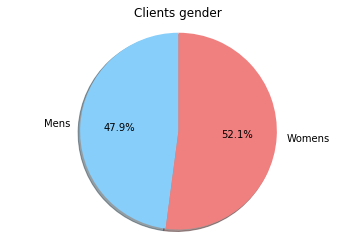

In [183]:
import matplotlib.pyplot as plt

labels = 'Mens', 'Womens'
sizes = [client_m , client_f]
colors = [ 'lightskyblue' , 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Clients gender')
plt.show()

__Nous modélisons à l'aide d'un histogramme la distribution des âges pour notre portefeuille de clients.__

In [184]:
transactions['transaction_age'].drop_duplicates().count() 

77

Text(0, 0.5, 'Headcounts')

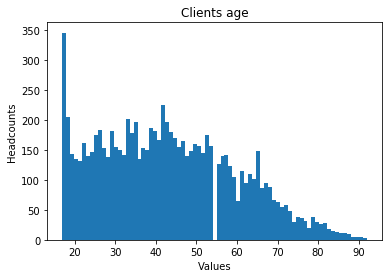

In [185]:
transactions.drop_duplicates(subset='client_id').hist(column='transaction_age', by=None, grid=False, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=77)
plt.title('Clients age')
plt.xlabel('Values')
plt.ylabel('Headcounts')

Il apparaît que nous possédons une jeune clientelle, mais que l'étendue de notre série est importante.

La quantité de clients qui ont 18 ans est très élevée, cela laisse penser qu'il y a un problème. C'est probablement l'age par défaut attribué.  

__Nous cherchons désormais à déterminer les 10 clients générant le plus haut chiffre d'affaire.__

In [186]:
customers_top10 = transactions[['client_id','price']].groupby('client_id').sum().sort_values(by = 'price',ascending=False).head(10).reset_index()
customers_top10 = customers_top10.merge(customers, how ='inner', on=['client_id'])
customers_top10['pourcentage_CA'] = (100 * customers_top10['price'] / CA).round(2)
customers_top10 = customers_top10[['client_id','sex', 'birth','price', 'pourcentage_CA']]
customers_top10.columns = 'client_id','sex', 'birth','CA', 'pourcentage_CA'
print(customers_top10.describe())
customers_top10


             birth             CA  pourcentage_CA
count    10.000000      10.000000       10.000000
mean   1978.500000   44915.548000        0.772000
std       8.669871   62581.792184        1.080389
min    1968.000000    2511.980000        0.040000
25%    1974.750000    2530.390000        0.040000
50%    1978.000000    2556.285000        0.040000
75%    1979.500000   68530.035000        1.180000
max    1999.000000  162007.340000        2.790000


,client_id,sex,birth,CA,pourcentage_CA
0,c_1609,m,1980,162007.34,2.79
1,c_4958,m,1999,144257.21,2.49
2,c_6714,f,1968,73218.64,1.26
3,c_3454,m,1969,54464.22,0.94
4,c_7959,f,1974,2564.25,0.04
5,c_8026,m,1978,2548.32,0.04
6,c_4491,f,1984,2540.53,0.04
7,c_2140,f,1977,2527.01,0.04
8,c_8392,f,1978,2515.98,0.04
9,c_7421,m,1978,2511.98,0.04


In [187]:
round(customers_top10['CA'].head(4).sum(),2)

433947.41

In [188]:
customers_top10['pourcentage_CA'].head(4).sum() #pourcentage du CA généré par les 4 meilleurs clients

7.48

In [189]:
round(100 * 4 / clients_uniques,2) #pourcentage des clients que représentent ces 4 clients

0.05

Nous constatons que les quatres premiers clients représentent  __0,05%__ des clients mais génèrent __7,48%__ du CA. 

Les montants engagés laissent penser qu'il s'agit de clients professionnels. 

Text(0, 0.5, 'Turnover')

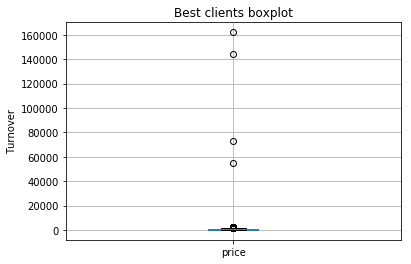

In [190]:
transactions.groupby('client_id').sum().boxplot(column='price', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)
plt.title('Best clients boxplot')
plt.xlabel('')
plt.ylabel('Turnover')

Text(0, 0.5, 'Turnover')

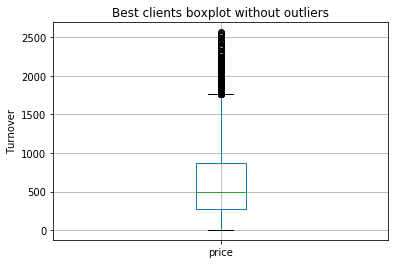

In [191]:
transactions_CA  = transactions.loc[(transactions['client_id'] != 'c_1609') & (transactions['client_id'] != 'c_4958') & (transactions['client_id'] !='c_6714') & (transactions['client_id'] != 'c_3454') ].groupby('client_id').sum().boxplot(column='price')

plt.title('Best clients boxplot without outliers')
plt.xlabel('')
plt.ylabel('Turnover')

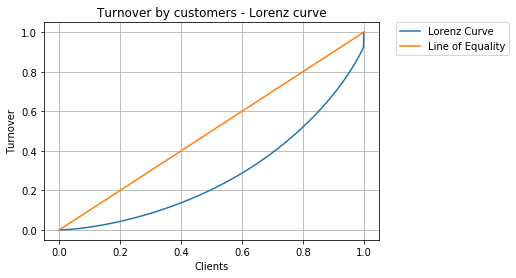

In [192]:
plt.title('Turnover by customers - Lorenz curve')
plt.xlabel('Clients')
plt.ylabel('Turnover')  

ca_customers = transactions.groupby('client_id').sum()['price'].values

lorenz = np.cumsum(np.sort(ca_customers)) / ca_customers.sum()
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz, label="Lorenz Curve")

plt.plot([0,1],label="Line of Equality")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.grid(b=None, which='major', axis='both')

plt.show()

Nous calculons l'indice de Gini correspondant : 

In [193]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe 
gini = 2*S
round(gini,2)

0.44

__Nous cherchons désormais à déterminer les 10 produits générant le plus haut chiffre d'affaire.__

In [194]:
products_top10 = transactions[['id_prod','price']].groupby('id_prod').sum().sort_values(by = 'price',ascending=False).head(10).reset_index()
products_top10.columns ='id_prod', 'CA'
products_top10['pourcentage_CA'] = (100 * products_top10['CA'] / CA).round(2)
products_top10 = products_top10.merge(products[['id_prod','price']], how ='inner', on=['id_prod'])
products_top10 = products_top10[['id_prod','price', 'CA', 'pourcentage_CA']]
products_top10

,id_prod,price,CA,pourcentage_CA
0,2_135,68.99,33874.09,0.58
1,2_112,67.57,31960.61,0.55
2,2_102,59.14,28919.46,0.50
3,2_209,69.99,27296.10,0.47
4,2_110,62.25,27016.50,0.47
5,1_369,23.99,25933.19,0.45
6,1_395,28.99,25830.09,0.45
7,2_166,230.04,25534.44,0.44
8,2_43,69.99,25266.39,0.44
9,2_39,57.99,25225.65,0.44


Text(0.5, 0, 'Turnovers')

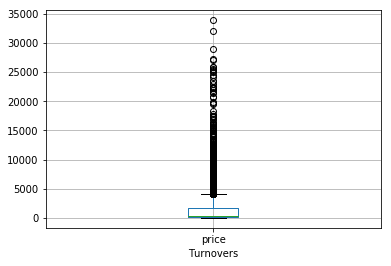

In [195]:
transactions[['id_prod','price']].groupby('id_prod').sum().sort_values(by = 'price',ascending=False).reset_index().boxplot(column='price')
plt.xlabel("Turnovers")

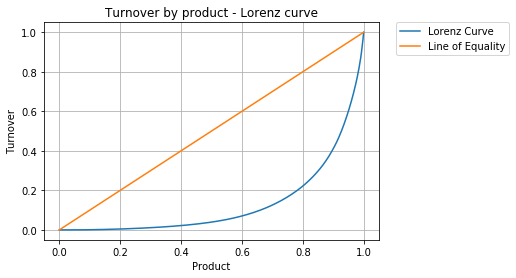

count     3265.000000
mean      1775.704355
std       3508.778949
min          0.990000
25%        119.160000
50%        402.300000
75%       1679.790000
max      33874.090000
Name: price, dtype: float64

id_prod
2_135    33874.09
2_112    31960.61
2_102    28919.46
2_209    27296.10
2_110    27016.50
1_369    25933.19
1_395    25830.09
2_166    25534.44
2_43     25266.39
2_39     25225.65
Name: price, dtype: float64


In [196]:
plt.title('Turnover by product - Lorenz curve')
plt.xlabel('Product')
plt.ylabel('Turnover')  

ca_products = transactions.groupby('id_prod').sum()['price'].values

lorenz = np.cumsum(np.sort(ca_products)) / ca_products.sum()
lorenz = np.append([0],lorenz)   

plt.plot(np.linspace(0,1,len(lorenz)),lorenz, label="Lorenz Curve")

plt.plot([0,1],label="Line of Equality")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.grid(b=None, which='major', axis='both')
  
plt.show()

print(transactions.groupby('id_prod').sum()['price'].describe())
print('')
print(transactions.groupby('id_prod').sum()['price'].sort_values(ascending=False).head(10))

__On constate une distribution de Pareto.__

Nous calculons l'indice de Gini correspondant : 

In [197]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe 
gini = 2*S
round(gini,2)

0.74

In [198]:
transactions['date_ymd'] = transactions['date'].dt.strftime("%Y-%m-%d")
transactions['date_ym'] = transactions['date'].dt.strftime("%y-%m")

         day      turnover
0     Monday  15905.944906
1    Tuesday  15868.500000
2  Wednesday  15736.073846
3   Thursday  15975.200385
4     Friday  16119.204038
5   Saturday  15787.541731
6     Sunday  15795.396154


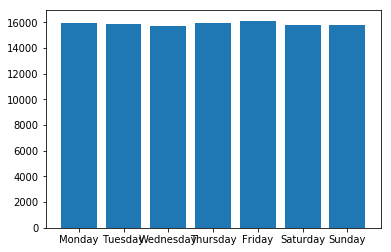

,turnover
count,7.000000
mean,15883.980151
std,131.274053
min,15736.073846
25%,15791.468942
50%,15868.500000
75%,15940.572645
max,16119.204038


In [199]:
tr_day = transactions.groupby('date_ymd').sum()[['price']].reset_index()
tr_day.columns = ['date','turnover']
tr_day['date'] =  pd.to_datetime(tr_day['date'], format="%Y-%m-%d")
tr_day['day'] = tr_day['date'].dt.day_name()
tr_day = tr_day[['date', 'day', 'turnover']]
tr_day = tr_day.groupby('day').mean()
tr_day = tr_day.reindex(['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'])
tr_day = tr_day.reset_index()

plt.bar(tr_day['day'],tr_day['turnover'])

print(tr_day)

plt.show()

tr_day.describe()

On constate qu'il y a peu d'écart entre les différents jours de la semaine en terme de chiffre d'affaires.

In [200]:
ymdms = transactions.copy() # création d'une copie avec les secondes et les minutes si nous étudions la conso. en fonctions de ces variables

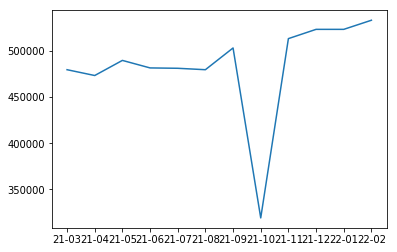

In [201]:
plt.plot(transactions['date_ym'].drop_duplicates().sort_values(),transactions.groupby('date_ym').sum()['price'])

On constate une brutale chute du CA au mois d'octobre 2021.

date_ymd
2021-09-26    17280.96
2021-09-27    18244.43
2021-09-28    17838.69
2021-09-29    18112.75
2021-09-30    18128.01
2021-10-01    16909.36
2021-10-02     9033.15
2021-10-03     8844.07
2021-10-04     9152.00
2021-10-05     9390.46
2021-10-06     9341.71
2021-10-07     8191.08
2021-10-08    10207.35
2021-10-09     9425.36
2021-10-10     8676.67
2021-10-11    10230.56
2021-10-12     8822.17
2021-10-13     9427.22
2021-10-14     9320.80
2021-10-15     9260.50
2021-10-16    10229.02
2021-10-17     9557.98
2021-10-18     9083.72
2021-10-19     8623.01
2021-10-20     9031.84
2021-10-21     9571.79
2021-10-22     8318.88
2021-10-23     8910.64
2021-10-24     9923.19
2021-10-25     8076.04
2021-10-26     8882.46
2021-10-27     9789.53
2021-10-28    14758.42
2021-10-29    16453.63
2021-10-30    15386.78
2021-10-31    16405.12
Name: price, dtype: float64
15884.040328767069
9211.52199999994


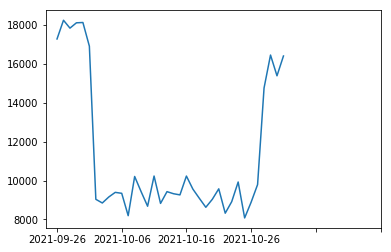

In [202]:
transactions_ymd = transactions[['date_ymd','price']].sort_values(by='date_ymd').loc[(transactions['date_ymd'] > '2021-09-25' )& (transactions['date_ymd']<'2021-11-01')]

plt.plot(transactions_ymd['date_ymd'].drop_duplicates(), transactions_ymd.groupby('date_ymd').sum()['price'])

plt.xticks(np.arange(0, 59, step=10))

print(transactions_ymd.groupby('date_ymd').sum()['price'])

print(transactions.groupby('date_ymd').sum()['price'].mean())

print(transactions.sort_values(by='date_ymd').loc[(transactions['date_ymd'] > '2021-10-02' )& (transactions['date_ymd']<'2021-10-28')].groupby('date_ymd').sum()['price'].mean())

In [203]:
round(100 * (15884.040328767069 - 9211.52199999994) / 15884.040328767069,2) 

42.01

Le chiffre d'affaires moyen pour la période du 02/10/2021 au 27/10/2021 est inférieur de 42,01 % par rapport au chiffre d'affaire moyen de l'ensemble de l'échantillon.

In [204]:
transactions[transactions['categ'] == 0].count()

session_id         209529
date               209529
day                209529
client_id          209529
sex                209529
birth              209529
transaction_age    209529
categ              209529
id_prod            209529
price              209529
date_ymd           209529
date_ym            209529
dtype: int64

In [205]:
print(transactions.groupby('date_ym').count()['session_id'])
print(transactions.groupby('date_ym').count()['session_id'].mean())
print(round(100 * (transactions.groupby('date_ym').count()['session_id'].mean() - 21584) / transactions.groupby('date_ym').count()['session_id'].mean(),2))



date_ym
21-03    28568
21-04    28415
21-05    28245
21-06    26819
21-07    24716
21-08    25619
21-09    33266
21-10    21584
21-11    28277
21-12    32424
22-01    29316
22-02    29567
Name: session_id, dtype: int64
28068.0
23.1


Sur la même période nous constatons une baisse de 23,1 % du nombre de transactions. 

In [206]:
print(transactions.sort_values(by='date_ymd').loc[(transactions['date_ymd'] > '2021-10-02' )& (transactions['date_ymd']<'2021-10-28')]['price'].mean())
print(transactions['price'].mean())

14.276117413674163
17.213180846579014


On constate que le prix moyen de la transaction a diminué également. 

([<matplotlib.axis.XTick at 0x19f0b2ec198>,
 <a list of 6 Text xticklabel objects>)

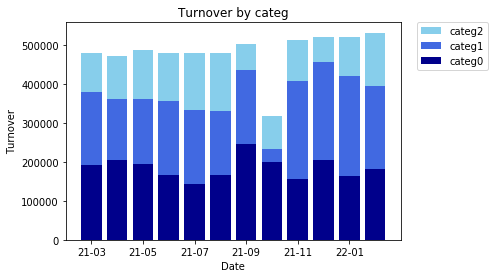

In [207]:
date_categ =transactions.groupby('date_ym').sum().reset_index()['date_ym']

categ = transactions.groupby(['date_ym','categ']).sum().reset_index()[['date_ym','categ','price']]

categ0 = categ[categ['categ'] == 0]['price'].reset_index(drop=True)

categ1 = categ0 + categ[categ['categ'] == 1]['price'].reset_index(drop=True)

categ2 = categ1 + categ[categ['categ'] == 2]['price'].reset_index(drop=True)

all_categ = ['categ2','categ1','categ0']

plt.bar(date_categ,categ2,color = ['skyblue'])
plt.bar(date_categ,categ1,color = ['royalblue'])
plt.bar(date_categ,categ0,color = ['darkblue'])

plt.title('Turnover by categ')
plt.xlabel('Date')
plt.ylabel('Turnover')  

plt.legend(all_categ,bbox_to_anchor=(1.05, 1), borderaxespad=0., loc=2)

plt.xticks(np.arange(0, 11, step=2))

In [208]:
CA_categ0 = categ[categ['categ'] == 0]['price'].reset_index(drop=True).mean()
CA_categ1 = categ[categ['categ'] == 1]['price'].reset_index(drop=True).mean()
CA_categ2 = categ[categ['categ'] == 2]['price'].reset_index(drop=True).mean()


In [209]:
round(100 * CA_categ0 / (CA_categ0 + CA_categ1 + CA_categ2),2)

38.48

In [210]:
round(100 * CA_categ1 / (CA_categ0 + CA_categ1 + CA_categ2),2)

38.76

In [211]:
round(100 * CA_categ2 / (CA_categ0 + CA_categ1 + CA_categ2),2)

22.76

En moyenne la catégorie 0 représente 38.48 % du chiffre d'affaores, la catégorie 1, 38,76 % du chiffre d'affaire et la catégorie 2, 22,76% du chiffre d'affaires. 

Cette effondrement du chiffre d'affairres s'explique par la forte diminution des produits appartenant à la catégorie 1 pendant cette même période.  

On peut imaginer un problème d'approvisionnement pour les produits de cette catégorie. 

In [212]:
transactions_october = transactions.sort_values(by='date_ymd').loc[(transactions['date_ymd'] > '2021-10-02' )& (transactions['date_ymd']<'2021-10-28')]

transactions_no_october1 = transactions.sort_values(by='date_ymd').loc[transactions['date_ymd'] < '2021-10-02' ]
transactions_no_october2 = transactions.sort_values(by='date_ymd').loc[transactions['date_ymd']>'2021-10-28']
transactions_no_october = transactions_no_october1.append(transactions_no_october2).reset_index(drop=True)

In [213]:
turnover_october = transactions_october['price'].sum()
turnover_october_c0 = transactions_october.loc[transactions_october['categ'] == 0]['price'].sum()
turnover_october_c1 = transactions_october.loc[transactions_october['categ'] == 1]['price'].sum()
turnover_october_c2 = transactions_october.loc[transactions_october['categ'] == 2]['price'].sum()

print(100*turnover_october_c0/turnover_october )
print(100*turnover_october_c1/turnover_october)
print(100*turnover_october_c2/turnover_october)

70.0427529782809
0.0
29.957247021719105


In [214]:
turnover_no_october = transactions_no_october['price'].sum()
turnover_no_october_c0 = transactions_no_october.loc[transactions_no_october['categ'] == 0]['price'].sum()
turnover_no_october_c1 = transactions_no_october.loc[transactions_no_october['categ'] == 1]['price'].sum()
turnover_no_october_c2 = transactions_no_october.loc[transactions_no_october['categ'] == 2]['price'].sum()

print(100*turnover_no_october_c0/turnover_no_october )
print(100*turnover_no_october_c1/turnover_no_october)
print(100*turnover_no_october_c2/turnover_no_october)

37.09765671738904
40.42622845957852
22.476114823032436


Les produits de la catégorie 1 représentent normalement 40,43 % du chiffre d'affaires de l'entreprise, or, durant la période en question, aucune transaction pour cette catégorie d'article n'est constatée.

Par ailleurs, la baisse de chiffre d'affaires global constatée est de 42,01 %, ce phénomène explique donc à lui seul la baisse de chiffre d'affaire. 

In [215]:
transactions_0_ymd = transactions[transactions['categ'] == 0].groupby('date_ymd').sum().reset_index()
transactions_0_ymd = transactions_0_ymd[['date_ymd','price']]
transactions_0_ymd.columns = ['date','turnover_categ0']

transactions_1_ymd = transactions[transactions['categ'] == 1].groupby('date_ymd').sum().reset_index()
transactions_1_ymd = transactions_1_ymd[['date_ymd','price']]
transactions_1_ymd.columns = ['date','turnover_categ1']

transactions_2_ymd = transactions[transactions['categ'] == 2].groupby('date_ymd').sum().reset_index()
transactions_2_ymd = transactions_2_ymd[['date_ymd','price']]
transactions_2_ymd.columns = ['date', 'turnover_categ2']

In [216]:
transactions_ymd = transactions_0_ymd.merge(transactions_1_ymd, how='outer', on=['date'])
transactions_ymd = transactions_ymd.merge(transactions_2_ymd, how='outer', on=['date'])
transactions_ymd = transactions_ymd.fillna(0)
transactions_ymd.columns = ['date', 'turnover_categ0', 'turnover_categ1', 'turnover_categ2']

([<matplotlib.axis.XTick at 0x19f242d5cc0>,
 <a list of 4 Text xticklabel objects>)

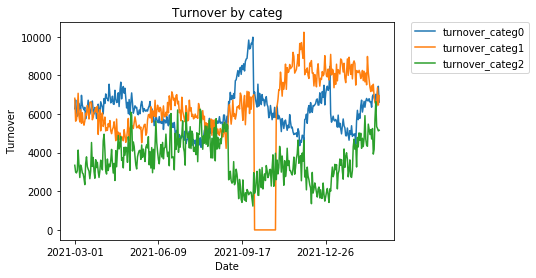

In [217]:
plt.plot(transactions_ymd['date'],transactions_ymd['turnover_categ0'])
plt.plot(transactions_ymd['date'],transactions_ymd['turnover_categ1'])
plt.plot(transactions_ymd['date'],transactions_ymd['turnover_categ2'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Turnover by categ')
plt.xlabel('Date')
plt.ylabel('Turnover')  

plt.xticks(np.arange(0,364, step=100))

In [218]:
transactions_0_count = transactions[transactions['categ'] == 0].groupby('date_ymd').count().reset_index()
transactions_0_count = transactions_0_count[['date_ymd','price']]
transactions_0_count.columns = ['date','count_categ0']

transactions_1_count = transactions[transactions['categ'] == 1].groupby('date_ymd').count().reset_index()
transactions_1_count = transactions_1_count[['date_ymd','price']]
transactions_1_count.columns = ['date','count_categ1']

transactions_2_count = transactions[transactions['categ'] == 2].groupby('date_ymd').count().reset_index()
transactions_2_count = transactions_2_count[['date_ymd','price']]
transactions_2_count.columns = ['date','count_categ2']

In [219]:
transactions_count = transactions_0_count.merge(transactions_1_count, how='outer', on=['date'])
transactions_count = transactions_count.merge(transactions_2_count, how='outer', on=['date'])
transactions_count = transactions_count.fillna(0)
transactions_count.columns = ['date', 'count_categ0', 'count_categ1', 'count_categ2']

Alors qu'essentiellement, les ventes des différentes catégories de produits se compensent permettant une hausse constante du chiffre d'affaires pour la période étudiée, la chute du chiffre d'affaire généré par la catégorie 1 ne l'est pas engendrant un recul du chiffre d'affaires global. 

10.646829794446507
20.480105800341146
75.17494929352434


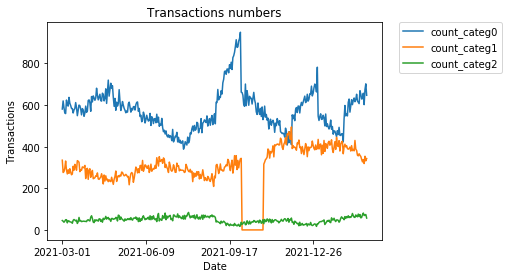

In [220]:
plt.plot(transactions_count['date'],transactions_count['count_categ0'])
plt.plot(transactions_count['date'],transactions_count['count_categ1'])
plt.plot(transactions_count['date'],transactions_count['count_categ2'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Transactions numbers')
plt.xlabel('Date')
plt.ylabel('Transactions')  

plt.xticks(np.arange(0,364, step=100))

print(transactions[transactions['categ'] == 0]['price'].mean())
print(transactions[transactions['categ'] == 1]['price'].mean())
print(transactions[transactions['categ'] == 2]['price'].mean())

In [221]:
transactions_ym_0 = transactions.loc[transactions.categ == 0].groupby('date_ym').count().reset_index()
transactions_ym_0 = transactions_ym_0[['date_ym','session_id']]
transactions_ym_0.columns = ['date','categ0_count']

transactions_ym_1 = transactions.loc[transactions.categ == 1].groupby('date_ym').count().reset_index()
transactions_ym_1 = transactions_ym_1[['date_ym','session_id']]
transactions_ym_1.columns = ['date','categ1_count']

transactions_ym_2 = transactions.loc[transactions.categ == 2].groupby('date_ym').count().reset_index()
transactions_ym_2 = transactions_ym_2[['date_ym','session_id']]
transactions_ym_2.columns = ['date','categ2_count']

transac_ym_count = transactions_ym_0.merge(transactions_ym_1, how='outer', on=['date'])
transac_ym_count = transac_ym_count.merge(transactions_ym_2, how='outer', on=['date'])

print(transac_ym_count)


     date  categ0_count  categ1_count  categ2_count
0   21-03         18119          9134          1315
1   21-04         19335          7579          1501
2   21-05         18485          8107          1653
3   21-06         15886          9264          1669
4   21-07         13569          9169          1978
5   21-08         15717          7954          1948
6   21-09         23124          9268           874
7   21-10         18758          1666          1160
8   21-11         14588         12316          1373
9   21-12         19289         12259           876
10  22-01         15386         12560          1370
11  22-02         17273         10459          1835


([<matplotlib.axis.XTick at 0x19f0f1b1c50>,
 <a list of 12 Text xticklabel objects>)

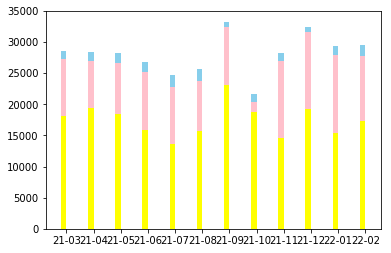

In [222]:
barWidth = 0.2

y1 = transac_ym_count['categ0_count']
y2 = transac_ym_count['categ1_count']
y3 = transac_ym_count['categ2_count']

r1 = [0,1,2,3,4,5,6,7,8,9,10,11]

plt.bar(r1, y1, width = barWidth, color = ['yellow' for i in y1], linewidth = 2)

plt.bar(r1, y2,bottom = y1,  width = barWidth, color = ['pink' for i in y1], linewidth = 4)

plt.bar(r1, y3, bottom = y1 + y2, width = barWidth, color = ['skyblue' for i in y1], linewidth = 6)

plt.xticks([r + barWidth / 2 for r in range(len(y1))], transac_ym_count['date'])

Volume de transactions mensuel, par catégories. 

# Mission n°3

## 1. Corrélation entre le sexe des clients et les catégories de produits achetés

In [223]:
trans = transactions.copy()

transactions = transactions.loc[(transactions['client_id'] != 'c_1609') & (transactions['client_id'] !='c_4958') & (transactions['client_id'] !='c_6714') & (transactions['client_id'] !='c_3454')]

Nous commençons par étudier la proportion d'hommes et de femmes parmi les acheteurs. 

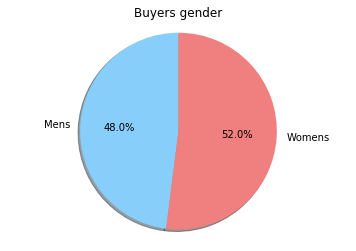

In [224]:
import matplotlib.pyplot as plt

labels = 'Mens', 'Womens'
sizes = [(100 * transactions['sex'].str.count('m').sum() / transactions['sex'].count()).round(2), (100 * transactions['sex'].str.count('f').sum() / transactions['sex'].count()).round(2)]
colors = [ 'lightskyblue' , 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Buyers gender')
plt.show()

Nous créons un tableau de contigence pour les variables "categ" et "sex" :

In [225]:
X = transactions['sex']
Y = transactions['categ']

c = transactions[['sex','categ']].pivot_table(index='sex',columns='categ',aggfunc=len)
cont = c.copy()

tx = transactions['sex'].value_counts()
ty = transactions['categ'].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(transactions)
cont = cont.astype(int)
cont

categ,0,1,2,Total
sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
total,195270,102625,15756,313651


Nous créons désormais un tableau de contigence pour l'hypothèse nulle, et une carte de chaleur :

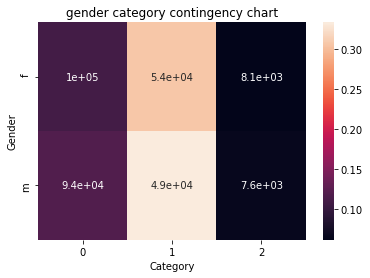

Le chi-2 est de 10.11086551372657


In [226]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(transactions)
indep = tx.dot(ty.T) / n
indep = indep.reindex(["f", "m"])

mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap((mesure/xi_n),annot=c)

plt.title('gender category contingency chart')
plt.xlabel('Category')
plt.ylabel('Gender')  

plt.show()

print('Le chi-2 est de ' + str(xi_n))

Cette carte de chaleur nous permet d'observer le composition du chi-2 obs.
On peut donc déduire que la corrélation entre les deux variables est la plus fort pour la catégorie et le genre masculin, suivie par la catégorie 1 et le genre féminin. 

Nous allons donc étudier plus clairement cette corrélation au travers de la statistique du chi-2.

In [227]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(c)

print(st_chi2)
print(st_dof)
print(st_p)

10.110865513726571
2
0.006374607510181767


Nous étudions le degré de signification (P value) trouvé ici en comparant le chi-2 obs établi à 10.111 et le chi-2 seuil  observable dans une table des valeurs critiques de la loi du chi-2 pour une erreur standard de 5% sachant que nous avons 2 degrés de liberté, il est de 5,991. 

Le chi-2 obs est supérieur au chi-2 seuil, on peut rejetter l'hypothèse nulle, il n y a que 0,64% de chance d'obtenir ce résultat par le hasard, sous H0.

Les variables sex et catégorie sont corrélées.

([<matplotlib.axis.XTick at 0x19f16623c88>,
 <a list of 3 Text xticklabel objects>)

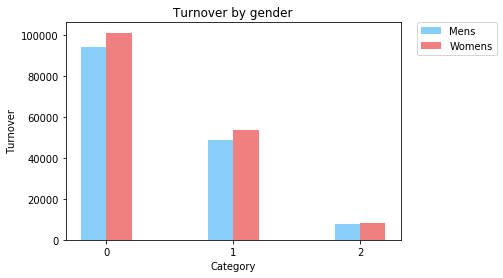

In [228]:
transactions_f = transactions[transactions['sex'] == 'f']
transactions_f_ym = transactions_f.groupby('date_ym').count().reset_index()
transactions_f_ym = transactions_f_ym[['date_ym', 'session_id']]
transactions_f_ym.columns = ['date', 'transactions_f']

transactions_m = transactions[transactions['sex'] == 'm']
transactions_m_ym = transactions_m.groupby('date_ym').count().reset_index()
transactions_m_ym = transactions_m_ym[['date_ym', 'session_id']]
transactions_m_ym.columns = ['date', 'transactions_m']


transactions_m_categ = transactions_m.groupby('categ').count()
transactions_m_categ = transactions_m_categ[['price']].reset_index()
transactions_m_categ.columns = ['categ','turnover_m']


transactions_f_categ = transactions_f.groupby('categ').count()
transactions_f_categ = transactions_f_categ[['price']].reset_index()
transactions_f_categ.columns = ['categ','turnover_f']

barWidth = 0.2

y1 = transactions_m_categ['turnover_m']
y2 = transactions_f_categ['turnover_f']

r1 = [0,1,2]
r2 = [x + barWidth for x in r1]

plt.bar(r1, y1, width = barWidth, color = ['lightskyblue' for i in y1], linewidth = 2,label="Men")

plt.bar(r2, y2, width = barWidth, color = [  'lightcoral' for i in y1], linewidth = 4, label="Women")

plt.title('Turnover by gender')
plt.xlabel('Category')
plt.ylabel('Turnover')  

plt.legend(labels,bbox_to_anchor=(1.05, 1), borderaxespad=0., loc=2)

plt.xticks([r + barWidth / 2 for r in range(len(y1))], transactions_m_categ['categ'])

## 2. Corrélations entre l'âge des clients et :


### a. Le montant total des achats

Nous représentons, par un nuage de point le rapport entre l'age et les dépenses des clients.

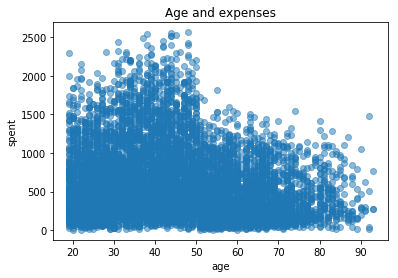

In [229]:
transac_client = transactions.groupby('client_id').sum().reset_index()
transac_client = transac_client[['client_id','price']]

transac_client = transac_client.merge(transactions[['client_id','birth']], how='right', on=['client_id'])

transac_client = transac_client[['client_id','birth','price']].drop_duplicates()

transac_client = transac_client.loc[(transac_client['client_id'] != 'c_1609') & (transac_client['client_id'] !='c_4958') & (transac_client['client_id'] !='c_6714') & (transac_client['client_id'] !='c_3454') & (transac_client['birth'] <2004)]

transac_client['age'] =  2022 - transac_client['birth'] 

plt.plot(transac_client["age"],transac_client["price"],'o',alpha=0.5,label= "Younger customers")

plt.xlabel("age")
plt.ylabel("spent")
plt.title('Age and expenses')

plt.show()

La distribution semble très différente avant 50 ans et après 50 ans et globalement non linéaire, aussi, nous allons analyser séparément ces deux échantillons : 

In [230]:
def lingress_summary(x,y):
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)   
    pearsonr = st.pearsonr(x,y)[0]
    
    print("slope: %f" % (slope))
    print("intercept: %f" % (intercept))
    print("pearson_correlation_coefficient: %f" % (r_value))
    print("r-squared: %f" % (r_value**2))
    print("p_value: %f" % (p_value))
    print("std_err: %f" % (std_err))

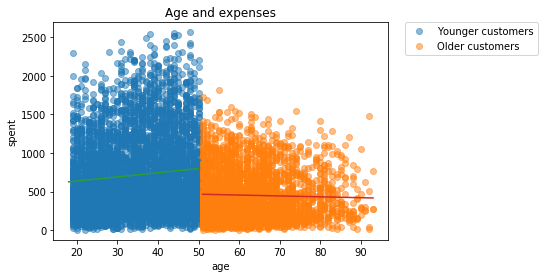

Régression linéaire pour les clients les plus jeunes : 

slope: 0.001779
intercept: 33.676173
pearson_correlation_coefficient: 0.097744
r-squared: 0.009554
p_value: 0.000000
std_err: 0.000251


Régression linéaire pour les clients les plus âgés : 

slope: -0.000959
intercept: 63.360037
pearson_correlation_coefficient: -0.033147
r-squared: 0.001099
p_value: 0.071126
std_err: 0.000531


In [231]:
from scipy.stats import linregress

transac_client_young = transac_client.loc[transac_client['age'] <=50]
transac_client_old = transac_client.loc[transac_client['age']  > 50]

plt.plot(transac_client_young["age"],transac_client_young["price"],'o',alpha=0.5,label= "Younger customers")
plt.plot(transac_client_old["age"],transac_client_old["price"],'o',alpha=0.5,label= "Older customers")

Y1 = transac_client_young['price']
X1 = transac_client_young[['age']]
X1 = X1.copy()
X1['intercept'] = 1.
result = sm.OLS(Y1, X1).fit()
a1,b1 = result.params['age'],result.params['intercept']
plt.plot(np.arange(18,51),[a1*x+b1 for x in np.arange(18,51)])

Y2 = transac_client_old['price']
X2 = transac_client_old[['age']]
X2 = X2.copy()
X2['intercept'] = 1.
result = sm.OLS(Y2, X2).fit()
a2,b2 = result.params['age'],result.params['intercept']
plt.plot(np.arange(51,94),[a2*x+b2 for x in np.arange(51,94)])

plt.xlabel("age")
plt.ylabel("spent")
plt.title('Age and expenses')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., loc=2)

plt.show()

slope, intercept, r_value, p_value, std_err = linregress(transac_client_young['price'],transac_client_young['age'])   

print('Régression linéaire pour les clients les plus jeunes : ')
print('')
lingress_summary(transac_client_young['price'],transac_client_young['age'])
print('')
print('')
print('Régression linéaire pour les clients les plus âgés : ')
print('')
lingress_summary(transac_client_old['price'],transac_client_old['age'])

Pour les __clients les plus jeunes__, on constate une __p_value__ très faible. On considère de manière classique qu'une p value inférieure à __0.01__ indique une très forte présomption contre l'hypothèse nulle, or, ici, elle est bien inférieure à ce seuil. 
Le __coefficient de corrélation de Pearson__ est faible, environ 0.01, ceci indique une légère corrélation entre les deux variables.
Enfin, le __coefficient de détermination__ est très bas, la droite de régression n'explique que très peu la distribution des points. On constate effectivement une importante dispersion des points autour de la droite. 

Pour les __clients les plus âgés__,  la __p_value__ est entre 0.05 et 0.1, il y a donc une faible présomption contre l'hypothèse nulle. 
Le __coefficient de corrélation de Pearson__ est bas, la corrélation négative entre les deux variables l'est donc tout autant.
Par conséquent, le __coefficient de détermination__ est également bas, ce qui témoigne d'une importante dispersion autour de la droite de régression. 

En somme, il existe bien une corrélation entre les deux variables mais elle est faible et non linéaire. Cette corrélation est plus importante pour les clients des moins de 50 ans que pour ceux ayants plus de 50 ans. De plus, elle est positive avant 50 ans et négative après cet âge. 

### b. La fréquence d'achat 

__Mensuel__

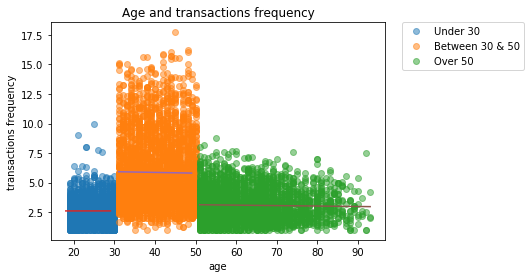

Régression linéaire pour les clients qui ont entre 18 ans et 30 ans : 

slope: 0.001928
intercept: 24.729799
pearson_correlation_coefficient: 0.000581
r-squared: 0.000000
p_value: 0.980177
std_err: 0.077571


Régression linéaire pour les clients qui ont entre 31 ans et 50 ans: 

slope: -0.023403
intercept: 40.643622
pearson_correlation_coefficient: -0.012091
r-squared: 0.000146
p_value: 0.483205
std_err: 0.033374


Régression linéaire pour les clients qui ont entre 51 ans et 94 ans: 

slope: -0.185494
intercept: 63.498431
pearson_correlation_coefficient: -0.026552
r-squared: 0.000705
p_value: 0.148326
std_err: 0.128294


In [232]:
frequency = transactions.groupby(['client_id','date_ym']).size().reset_index()
frequency.columns = ['client_id', 'date_ym', 'frequency']
frequency= frequency.groupby('client_id').mean()
frequency['frequency'] = frequency['frequency'].round(2)
frequency= frequency.merge(transac_client[['client_id','age']], how ='inner', on=['client_id'])

X1 = frequency[['age']].loc[(frequency['age'] <= 30)]
Y1 = frequency["frequency"].loc[(frequency['age'] <= 30)]

X2 = frequency[['age']].loc[(frequency['age'] > 30) & (frequency['age'] <= 50)]
Y2 = frequency["frequency"].loc[(frequency['age'] > 30) & (frequency['age'] <= 50)]

X3 = frequency[['age']].loc[(frequency['age'] > 50)]
Y3 = frequency["frequency"].loc[(frequency['age'] > 50)]

plt.plot(X1, Y1,'o',alpha=0.5,label= 'Under 30')
plt.plot(X2,Y2,'o',alpha=0.5, label = "Between 30 & 50")
plt.plot(X3,Y3,'o',alpha=0.5, label = "Over 50")

X1 = X1.copy()
X1['intercept'] = 1.
result = sm.OLS(Y1, X1).fit()
a1,b1 = result.params['age'],result.params['intercept']
plt.plot(np.arange(18,30),[a1*x+b1 for x in np.arange(18,30)])

X2 = X2.copy()
X2['intercept'] = 1.
result = sm.OLS(Y2, X2).fit()
a2,b2 = result.params['age'],result.params['intercept']
plt.plot(np.arange(31,50),[a2*x+b2 for x in np.arange(31,50)])

X3 = X3.copy()
X3['intercept'] = 1.
result = sm.OLS(Y3, X3).fit()
a3,b3 = result.params['age'],result.params['intercept']
plt.plot(np.arange(51,94),[a3*x+b3 for x in np.arange(51,94)])

plt.xlabel("age")
plt.ylabel("transactions frequency")
plt.title('Age and transactions frequency')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., loc=2)

plt.show()

print('Régression linéaire pour les clients qui ont entre 18 ans et 30 ans : ')
print('')
lingress_summary(Y1, frequency['age'].loc[(frequency['age'] <= 30)])
print('')
print('')
print('Régression linéaire pour les clients qui ont entre 31 ans et 50 ans: ')
print('')
lingress_summary(Y2,frequency['age'].loc[(frequency['age'] > 30) & (frequency['age'] <= 50)])
print('')
print('')
print('Régression linéaire pour les clients qui ont entre 51 ans et 94 ans: ')
print('')
lingress_summary(Y3,frequency['age'].loc[(frequency['age'] > 50)])

Nous constatons 3 tendances pour la distribution, en fonction de l'âge du client. 

Néanmoins, ce constat basé sur l'observation du nuage de point ne se vérifi pas par l'étude de régressions linéaires. 

En effet, la distribution de l'échantillon complet est non linéaire.

Pour le sous-échantillon des __clients âgés de moins de 31 ans__ la p value est très élevées, __l'hypothèse nulle est très probable__.
Le coefficient de corrélation de Pearson est très faible, les deux variables donc __peu corrélée__.
Le coefficient de détermination est lui aussi bas ce qui témoigne d'une __grande dispersion des points par rapport à la droite de régression__. 

Pour le sous-échantillon des clients ____âgés de plus de 30 ans et de moins de 51 ans__, nous avons encore une p value qui laisse penser que __l'hypotthèse nulle est envisageable__.
On constate une __très légère corrélation négative__ d'après le coefficient de corrélation de Pearson.
Enfin, le coefficient de détermination nous laisse comprendre qu'il y a une __forte dispersion du nuage de point autour de la droite de régression__. 

Pour le sous-échantillon des clients __âgés de plus de plus de 51 ans__, nous avons toujours une p value qui laisse penser que __l'hypotthèse nulle est envisageable__.
On constate une __très légère corrélation négative__ d'après le coefficient de corrélation de Pearson.
Enfin, le coefficient de détermination nous laisse comprendre qu'il y a une forte __dispersion du nuage de point autour de la droite de régression__. 
Des trois sous-échantillons, c'est celui dans lequel il y a la plus haute possibilité qu'une corrélation soit avérée. 

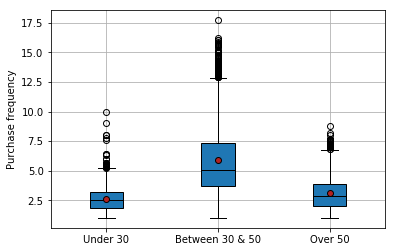

Fréquence d'achat pour les clients agés de moins de 30 ans :

count    1829.000000
mean        2.608857
std         1.041972
min         1.000000
25%         1.860000
50%         2.500000
75%         3.200000
max        10.000000
Name: frequency, dtype: float64

Fréquence d'achat pour les clients agés de moins de 50 ans :

count    3365.000000
mean        5.863914
std         2.886838
min         1.000000
25%         3.700000
50%         5.080000
75%         7.360000
max        17.730000
Name: frequency, dtype: float64

Fréquence d'achat pour les clients de plus de 50 ans :

count    2965.000000
mean        3.085238
std         1.325757
min         1.000000
25%         2.000000
50%         2.860000
75%         3.900000
max         8.750000
Name: frequency, dtype: float64


In [233]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot([  frequency["frequency"].loc[(frequency['age'] <= 30)], frequency["frequency"].loc[(frequency['age'] > 30) & (frequency['age'] <= 50)], frequency["frequency"].loc[(frequency['age'] > 50)]],patch_artist=True, showmeans=True, medianprops = medianprops ,meanprops = meanprops)

plt.gca().xaxis.set_ticklabels(['Under 30', "Between 30 & 50", "Over 50"])

plt.ylabel('Purchase frequency')

plt.grid(b=None, which='major', axis='both')

plt.show()

print("Fréquence d'achat pour les clients agés de moins de 30 ans :")
print('')
print(frequency["frequency"].loc[(frequency['age'] <= 30)].describe())
print('')
print("Fréquence d'achat pour les clients agés de moins de 50 ans :")
print('')
print(frequency["frequency"].loc[(frequency['age'] > 30) & (frequency['age'] <= 50)].describe())
print('')
print("Fréquence d'achat pour les clients de plus de 50 ans :")
print('')
print(frequency["frequency"].loc[(frequency['age'] > 50)].describe())

Les clients qui ont entre 30 et 50 ans font des achats plus fréquents que ceux appartenant aux deux autres catégories. 

Cette diffèrence est notable et elle se vérifie au niveau de la moyenne, de la médianne et de la dispersion des séries. 

### c. La taille du panier moyen

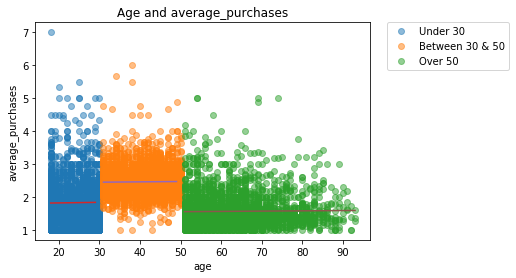

Régression linéaire pour les clients qui ont entre 18 ans et 30 ans : 

slope: 0.068760
intercept: 23.310456
pearson_correlation_coefficient: 0.010993
r-squared: 0.000121
p_value: 0.600962
std_err: 0.131449


Régression linéaire pour les clients qui ont entre 31 ans et 50 ans: 



ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [234]:
transactions['age'] = 2022 - transactions['birth']

average_purchases = transactions.groupby(['client_id','session_id']).count().groupby('client_id').mean()[['date']].reset_index()
average_purchases.columns = ['client_id','average_purchases']
average_purchases['average_purchases'] = average_purchases['average_purchases'].round(2)

average_purchases = average_purchases.merge(transactions[['client_id','age']].drop_duplicates(), how='inner', on=['client_id'])

plt.plot(average_purchases["age"].loc[(average_purchases['age'] <= 30)],average_purchases["average_purchases"].loc[(average_purchases['age'] <= 30)],'o',alpha=0.5,label= 'Under 30')
plt.plot(average_purchases["age"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)],average_purchases["average_purchases"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)],'o',alpha=0.5,label = "Between 30 & 50")
plt.plot(average_purchases["age"].loc[(average_purchases['age'] > 50)],average_purchases["average_purchases"].loc[(average_purchases['age'] > 50)],'o',alpha=0.5, label = "Over 50")

X1 = average_purchases[['age']].loc[(average_purchases['age'] <= 30)]
Y1 = average_purchases["average_purchases"].loc[(average_purchases['age'] <= 30)]
X1 = X1.copy()
X1['intercept'] = 1.
result = sm.OLS(Y1, X1).fit()
a1,b1 = result.params['age'],result.params['intercept']
plt.plot(np.arange(18,30),[a1*x+b1 for x in np.arange(18,30)])

X2 = average_purchases[['age']].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)]
Y2 = average_purchases["average_purchases"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)]
X2 = X2.copy()
X2['intercept'] = 1.
result = sm.OLS(Y2, X2).fit()
a2,b2 = result.params['age'],result.params['intercept']
plt.plot(np.arange(31,50),[a2*x+b2 for x in np.arange(31,50)])

X3 = average_purchases[['age']].loc[(average_purchases['age'] > 50)]
Y3 = average_purchases["average_purchases"].loc[(average_purchases['age'] > 50)]
X3 = X3.copy()
X3['intercept'] = 1.
result = sm.OLS(Y3, X3).fit()
a3,b3 = result.params['age'],result.params['intercept']
plt.plot(np.arange(51,94),[a3*x+b3 for x in np.arange(51,94)])

plt.xlabel("age")
plt.ylabel("average_purchases")
plt.title('Age and average_purchases')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., loc=2)

plt.show()

print('Régression linéaire pour les clients qui ont entre 18 ans et 30 ans : ')
print('')
lingress_summary(Y1, average_purchases['age'].loc[(average_purchases['age'] <= 30)])
print('')
print('')
print('Régression linéaire pour les clients qui ont entre 31 ans et 50 ans: ')
print('')
lingress_summary(Y2, average_purchases['age'].loc[(average_purchases['age'] <= 30)])
print('')
print('')
print('Régression linéaire pour les clients qui ont entre 51 ans et 94 ans: ')
print('')
lingress_summary(Y3,average_purchases['age'].loc[(average_purchases['age'] > 50)])

La p value des trois sous-échantillons ne permet pas d'écarter l'hypothèse nulle.

L'analyse du coefficient de Pearson pour ces trois sous-échantillons et du coefficient de détermination ne permet pas d'établir une corrélation entre les deux variables.

Néanmoins, on constate en observant le nuage de point semble bien montrer une corrélation. 

In [ ]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot([  average_purchases["average_purchases"].loc[(average_purchases['age'] <= 30)], average_purchases["average_purchases"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)], average_purchases["average_purchases"].loc[(average_purchases['age'] > 50)]],patch_artist=True, showmeans=True, medianprops = medianprops ,meanprops = meanprops)

plt.gca().xaxis.set_ticklabels(['Under 30', "Between 30 & 50", "Over 50"])

plt.ylabel('Average_purchases')

plt.grid(b=None, which='major', axis='both')

plt.show()

print("Panier moyen, en nombre d'articles, pour les clients agés de moins de 30 ans :")
print('')
print(average_purchases["average_purchases"].loc[(average_purchases['age'] <= 30)].describe())
print('')
print("Panier moyen, en nombre d'articles, pour les clients agés de moins de 50 ans :")
print('')
print(average_purchases["average_purchases"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)].describe())
print('')
print("Panier moyen, en nombre d'articles, pour les clients de plus de 50 ans :")
print('')
print(average_purchases["average_purchases"].loc[(average_purchases['age'] > 50)].describe())

In [ ]:
X = average_purchases['age']
Y = average_purchases['average_purchases']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(X,Y)

La valeur de l'eta carré nous indique qu'il y a probablement une corrélation entre les deux variables. 

In [235]:
st.f_oneway( average_purchases['age'].loc[(average_purchases['age'] <= 30)],
            average_purchases["average_purchases"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)],
            average_purchases["average_purchases"].loc[(average_purchases['age'] > 50)])

F_onewayResult(statistic=84129.26451972395, pvalue=0.0)

Cette pvalue nous permet de rejetter l'hypothèse nulle

In [237]:
average_purchases.shape

(8596, 3)

In [239]:
11960 * 3 # calcul du degré de liberté 

25788

### d. Les catégories de produits achetés

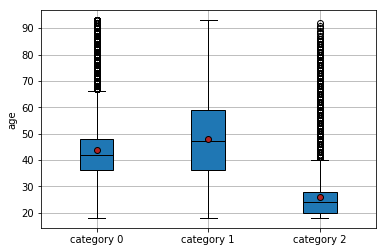

Catégorie 0 :

count    2266.000000
mean        1.825989
std         0.653266
min         1.000000
25%         1.380000
50%         1.670000
75%         2.100000
max         7.000000
Name: average_purchases, dtype: float64

Catégorie 1 :

count    3365.000000
mean        2.459611
std         0.399314
min         1.000000
25%         2.220000
50%         2.410000
75%         2.640000
max         6.000000
Name: average_purchases, dtype: float64

Catégorie 2 :

count    2965.000000
mean        1.564536
std         0.493477
min         1.000000
25%         1.250000
50%         1.420000
75%         1.730000
max         5.000000
Name: average_purchases, dtype: float64


In [240]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot([  transactions["age"][transactions['categ'] == 0], transactions["age"][transactions['categ'] == 1], transactions["age"][transactions['categ'] == 2]],patch_artist=True, showmeans=True, medianprops = medianprops ,meanprops = meanprops)

plt.gca().xaxis.set_ticklabels(['category 0', "category 1", "category 2"])

plt.ylabel('age')

plt.grid(b=None, which='major', axis='both')

plt.show()

             
print("Catégorie 0 :")
print('')
print(average_purchases["average_purchases"].loc[(average_purchases['age'] <= 30)].describe())
print('')
print("Catégorie 1 :")
print('')
print(average_purchases["average_purchases"].loc[(average_purchases['age'] > 30) & (average_purchases['age'] <= 50)].describe())
print('')
print("Catégorie 2 :")
print('')
print(average_purchases["average_purchases"].loc[(average_purchases['age'] > 50)].describe())

Les variables semblent corélées, puisque la moyenne, la médiane et la variance sont différentes d'une catégorie à l'autre. 

Nous pouvons le vérifier en calculant l'eta carré :

In [241]:
X = transactions['categ']
Y = transactions['age'] 

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(X,Y)

0.11279029932310781

Le résultat trouvé nous laisse pensé qu'il y a bien une corrélation légère entre les variables. 

In [242]:
st.f_oneway(transactions["age"][transactions['categ'] == 0],
            transactions["age"][transactions['categ'] == 1],
            transactions["age"][transactions['categ'] == 2])

F_onewayResult(statistic=19936.91670363778, pvalue=0.0)

La p valeur est proche de 0, l'hypothèse nulle peut être rejetée. 